# The cost function is NOT independent of number of trials

You might think that different  numbers of trials just affect variability in the cost function, not the mean value.  **This is wrong.**

Take a well-trained network and a random seed equal to the one used to measure cost at, say 10000 trials.  The cost function includes a squared error term for how close to the target the mean hits are. At few trials, the typical distance to the target will be greater than for many trials. So, as number of trials grows, cost falls, even under these conditions.  



<img src="costs_vs_ntrials.jpg">



In [3]:
# === general startup

include("startup.jl")
include("commonSetup.jl")


     finished loading system modules in startup.jl ---
     finished loading user modules in startup.jl ---

--- finished loading startup.jl ---



argsSeedBounder

In [4]:
# === read in an example farm

u = readdir("../../MiniC32/")
i=1; G = load("../../MiniC32/$(u[i])")

extra_pars = G["extra_pars"]
extra_pars[:plot_conditions] = true
extra_pars[:pro_better_than_anti] = true

mypars[:rule_and_delay_periods] = [1.0 1.2]


┌ Warning: type oldbool not present in workspace; reconstructing
└ @ JLD /Users/carlos/.julia/packages/JLD/jeGJb/src/jld_types.jl:697


1×2 Array{Float64,2}:
 1.0  1.2

In [12]:
# === now run the farm nruns times at each of different # of trials, OR load from pre-run

generate_costs = false

if generate_costs
    ns = [25,50,100,200,400,800]   # of trials
    nruns=10   # of runs at eah # of trials
    costs = zeros(length(ns), nruns)  # record of costs

    for nsi=1:length(ns)
        for r=1:nruns
            ntrials = ns[nsi]; extra_pars[:nPro] = ntrials; extra_pars[:nAnti] = ntrials; 
            extra_pars[:seedrand] = NaN; 
            costs[nsi,r] = JJ(extra_pars[:nPro], extra_pars[:nAnti]; verbose=false, 
                asDict=true, make_dict(args, G["pars3"], merge(mypars, extra_pars))...)["cost"]
            println("Did ns=$(ns[nsi]) run $r/$nruns.")
        end
    end

    @save "costs_vs_ntrials.jld" ns nruns costs
else
    @load "costs_vs_ntrials.jld"
end

3-element Array{Symbol,1}:
 :costs
 :nruns
 :ns   

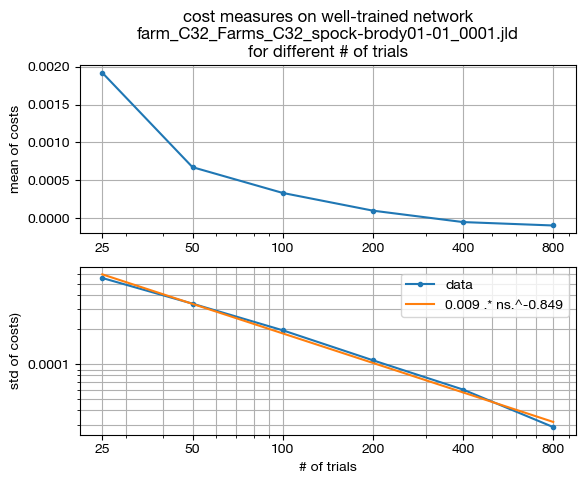

/Users/carlos/Papers/AnnDuan/superior_colliculus_mutual_inhibition/A_REWRITE/costs_vs_ntrials.png
  /Users/carlos/Papers/AnnDuan/superior_colliculus_mutual_inhibition/A_REWRITE/costs_vs_ntrials.jpg


5-element Array{PyCall.PyObject,1}:
 PyObject Text(0, 1e-06, '1.0e-6') 
 PyObject Text(0, 1e-05, '1.0e-5') 
 PyObject Text(0, 0.0001, '0.0001')
 PyObject Text(0, 0.001, '0.001')  
 PyObject Text(0, 0.01, '0.01')    

In [43]:
# === generate the plot
PyPlot.rc("font", serif="Helvetica Neue")

figure();
subplot(2,1,1)
semilogx(ns, mean(costs, dims=2), ".-"); ylabel("mean of costs")
title("cost measures on well-trained network\n$(u[1])\nfor different # of trials")
gca().set_xticks(ns)
gca().set_xticklabels(map(x->string(x), ns))
grid("on")

subplot(2,1,2)
loglog(ns, std(costs, dims=2), ".-", label="data"); 

X = [log10.(ns) ones(length(ns))]
y = log10.(std(costs, dims=2))
m,b = X\y
sdHat = ns -> 10 .^b .* ns.^m

loglog(ns, sdHat(ns), "-", label="$(round(10 .^b,digits=3)) .* ns.^$(round(m,digits=3))"); 


ylabel("std of costs)")
xlabel("# of trials")
gca().set_xticks(ns)
gca().set_xticklabels(map(x->string(x), ns));
grid("on", which="both")
legend()

savefig2jpg("costs_vs_ntrials")
gca().set_yticklabels(map(x->string(x), gca().get_yticks()))



In [46]:
sdHat(400)

5.7010763418563606e-5

In [39]:
?round

search: round rounding RoundUp RoundDown RoundToZero RoundingMode RoundNearest



```
round(z::Complex[, RoundingModeReal, [RoundingModeImaginary]])
round(z::Complex[, RoundingModeReal, [RoundingModeImaginary]]; digits=, base=10)
round(z::Complex[, RoundingModeReal, [RoundingModeImaginary]]; sigdigits=, base=10)
```

Return the nearest integral value of the same type as the complex-valued `z` to `z`, breaking ties using the specified [`RoundingMode`](@ref)s. The first [`RoundingMode`](@ref) is used for rounding the real components while the second is used for rounding the imaginary components.

# Example

```jldoctest
julia> round(3.14 + 4.5im)
3.0 + 4.0im
```

---

```
round([T,] x, [r::RoundingMode])
round(x, [r::RoundingMode]; digits::Integer=0, base = 10)
round(x, [r::RoundingMode]; sigdigits::Integer, base = 10)
```

Rounds the number `x`.

Without keyword arguments, `x` is rounded to an integer value, returning a value of type `T`, or of the same type of `x` if no `T` is provided. An [`InexactError`](@ref) will be thrown if the value is not representable by `T`, similar to [`convert`](@ref).

If the `digits` keyword argument is provided, it rounds to the specified number of digits after the decimal place (or before if negative), in base `base`.

If the `sigdigits` keyword argument is provided, it rounds to the specified number of significant digits, in base `base`.

The [`RoundingMode`](@ref) `r` controls the direction of the rounding; the default is [`RoundNearest`](@ref), which rounds to the nearest integer, with ties (fractional values of 0.5) being rounded to the nearest even integer. Note that `round` may give incorrect results if the global rounding mode is changed (see [`rounding`](@ref)).

# Examples

```jldoctest
julia> round(1.7)
2.0

julia> round(Int, 1.7)
2

julia> round(1.5)
2.0

julia> round(2.5)
2.0

julia> round(pi; digits=2)
3.14

julia> round(pi; digits=3, base=2)
3.125

julia> round(123.456; sigdigits=2)
120.0

julia> round(357.913; sigdigits=4, base=2)
352.0
```

!!! note
    Rounding to specified digits in bases other than 2 can be inexact when operating on binary floating point numbers. For example, the [`Float64`](@ref) value represented by `1.15` is actually *less* than 1.15, yet will be rounded to 1.2.

    # Examples

    ```jldoctest; setup = :(using Printf)
    julia> x = 1.15
    1.15

    julia> @sprintf "%.20f" x
    "1.14999999999999991118"

    julia> x < 115//100
    true

    julia> round(x, digits=1)
    1.2
    ```


# Extensions

To extend `round` to new numeric types, it is typically sufficient to define `Base.round(x::NewType, r::RoundingMode)`.

---

```
round(dt::TimeType, p::Period, [r::RoundingMode]) -> TimeType
```

Return the `Date` or `DateTime` nearest to `dt` at resolution `p`. By default (`RoundNearestTiesUp`), ties (e.g., rounding 9:30 to the nearest hour) will be rounded up.

For convenience, `p` may be a type instead of a value: `round(dt, Dates.Hour)` is a shortcut for `round(dt, Dates.Hour(1))`.

```jldoctest
julia> round(Date(1985, 8, 16), Dates.Month)
1985-08-01

julia> round(DateTime(2013, 2, 13, 0, 31, 20), Dates.Minute(15))
2013-02-13T00:30:00

julia> round(DateTime(2016, 8, 6, 12, 0, 0), Dates.Day)
2016-08-07T00:00:00
```

Valid rounding modes for `round(::TimeType, ::Period, ::RoundingMode)` are `RoundNearestTiesUp` (default), `RoundDown` (`floor`), and `RoundUp` (`ceil`).

---

```
round(x::Period, precision::T, [r::RoundingMode]) where T <: Union{TimePeriod, Week, Day} -> T
```

Round `x` to the nearest multiple of `precision`. If `x` and `precision` are different subtypes of `Period`, the return value will have the same type as `precision`. By default (`RoundNearestTiesUp`), ties (e.g., rounding 90 minutes to the nearest hour) will be rounded up.

For convenience, `precision` may be a type instead of a value: `round(x, Dates.Hour)` is a shortcut for `round(x, Dates.Hour(1))`.

```jldoctest
julia> round(Dates.Day(16), Dates.Week)
2 weeks

julia> round(Dates.Minute(44), Dates.Minute(15))
45 minutes

julia> round(Dates.Hour(36), Dates.Day)
2 days
```

Valid rounding modes for `round(::Period, ::T, ::RoundingMode)` are `RoundNearestTiesUp` (default), `RoundDown` (`floor`), and `RoundUp` (`ceil`).

Rounding to a `precision` of `Month`s or `Year`s is not supported, as these `Period`s are of inconsistent length.


In [32]:
X = [log10.(ns) ones(length(ns))]
y = log10.(std(costs, dims=2))

m,b = X\y

sdHat = 10 .^b .* ns.^m


6-element Array{Float64,1}:
 0.0006000871414359583 
 0.0003331577764005714 
 0.00018496331001289834
 0.00010268836111390514
 5.7010763418563606e-5 
 3.16513683762289e-5   

In [20]:
using MultivariateStats

6-element Array{Float64,1}:
 0.0006000871414359583 
 0.0003331577764005714 
 0.00018496331001289834
 0.00010268836111390514
 5.7010763418563606e-5 
 3.16513683762289e-5   

In [31]:
[m b]

1×2 Array{Float64,2}:
 -0.848966  -2.03498

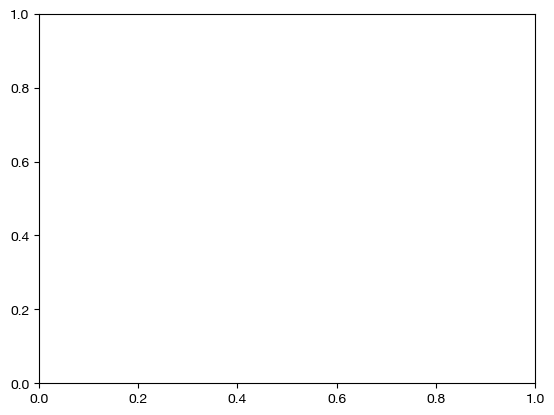

6-element Array{Float64,1}:
 0.0               
 0.2               
 0.4               
 0.6000000000000001
 0.8               
 1.0               

In [15]:
gca().get_xticks()